# Banking Loan Modeling 
* Thera bank is intrested in expanding rapidly to bring in more loan business and in the process , earn more through the intrest on loans i.e it wants to convert the liability customers into personal loan customers  
* it wants to build a model that will help them identitfy the potential customers who have higher probability of purchasing the loans

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read the excel file into pandas DataFrame
df =  pd.read_excel("Bank_Personal_Loan_Modelling (3).xlsx",sheet_name=1)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


* Here Personal loan is the target variable which describes who has opted for the loan(0) and who has not opted for the loan(1)

In [5]:
# Removing unecessary variables 
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

 Since the ID and Zip Code doesn't contribute much to the data set it has been removed 

In [6]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [31]:
df.shape

(5000, 12)

In [7]:
#checking for null values 
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

None of the column variables have Null Values in the data set.

In [8]:
#Checking for Duplicates 
df.duplicated().sum()

13

Dropping the duplicate values from the data set 

In [9]:
#Dropping Duplicate values 
df.drop_duplicates()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.600000,1,0,0,1,0,0,0
1,45,19,34,3,1.500000,1,0,0,1,0,0,0
2,39,15,11,1,1.000000,1,0,0,0,0,0,0
3,35,9,100,1,2.700000,2,0,0,0,0,0,0
4,35,8,45,4,1.000000,2,0,0,0,0,0,1
5,37,13,29,4,0.400000,2,155,0,0,0,1,0
6,53,27,72,2,1.500000,2,0,0,0,0,1,0
7,50,24,22,1,0.300000,3,0,0,0,0,0,1
8,35,10,81,3,0.600000,2,104,0,0,0,1,0
9,34,9,180,1,8.900000,3,0,1,0,0,0,0


In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Here we can see that experience has min value -3 which is not the correct info .

In [29]:
# Replacing negative experience values with the median value in the Experience column:
negexp=df[df['Experience']<0]
negexp['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [33]:
val=[-3, -2, -1]

for i in val:
    df['Experience']=df['Experience'].replace(val,np.median(df['Experience']))

In [34]:
df['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# Exploratatory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C24B729128>,
      dtype=object)

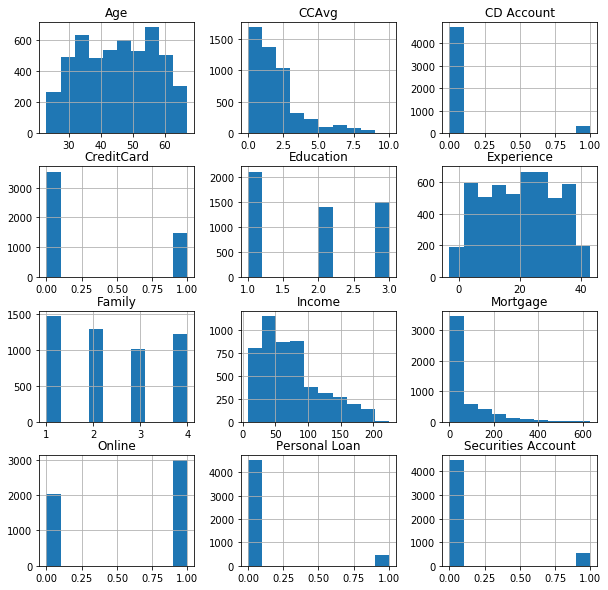

In [32]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=(10,10))

* Age and Experience has distribution across mean and hence normally distributed.

* Income,CCAvg,Mortgage: Positively skewed i.e median is lesser than the mean value.

* Income ,CCAvg and Mortage has outliers in the data 

In [36]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

### Boxplot 

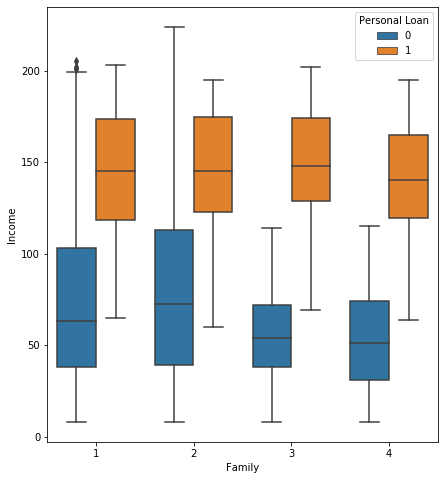

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(7,8))
sns.boxplot(data=df,x = df['Family'],y=df['Income'],hue='Personal Loan')
plt.show()

* Box Plot between Income and Family shows that People with high income irrespective of family size has opted for personal Loan 

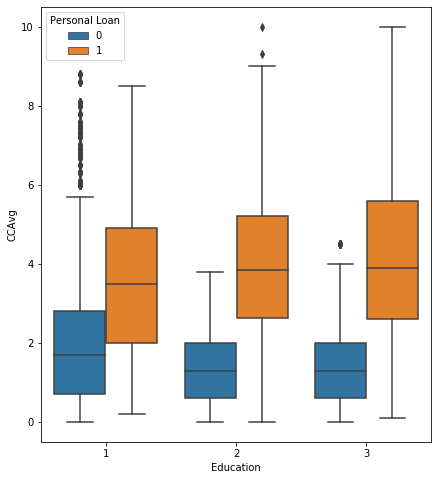

In [42]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df,x = df['Education'],y=df['CCAvg'],hue='Personal Loan')
plt.show()

* Boxplot between Education and CCAvg show that Irrespective of Education, people who have good CCAvg > 2.5 seems to have opted out for the Personal Loan.

### Correlation

In [44]:
c= df.corr()
c

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048730,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018074,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


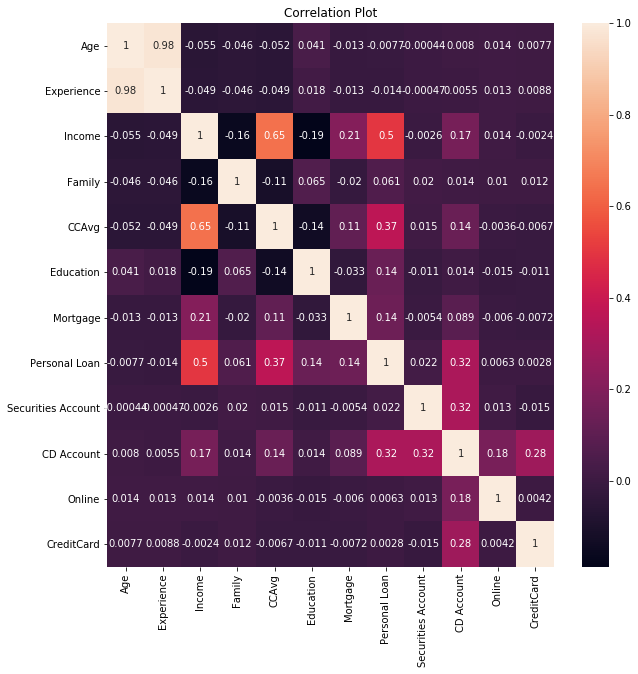

In [45]:
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(data=c,annot=True)
plt.show()

* Age and Experience are highly correlated with each other,hence we can consider any one variable.
* here we are dropping Experiencevariable 

In [49]:
df.drop(['Experience'],axis=1,inplace=True)

In [50]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

### Scatter Plot between continous variabes 

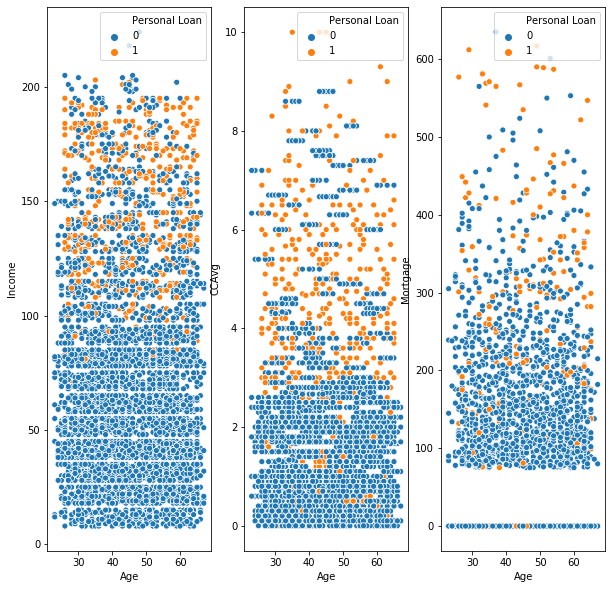

In [51]:
col = ['Income','CCAvg','Mortgage']
plt.figure(figsize=(10,10))
j=3
k=0
for i in col:
    plt.subplot(1,j,j*(k+1)//j)
    sns.scatterplot(x='Age',y=i,hue='Personal Loan',data=df)
    k=k+1
plt.show()

* Age v/s Income: People with more income (>100$) seems to have opted for Personal Loan.

* Age v/s CCAvg: Also people with high CCAvg seems to have opted for Personal Loan.

### Count plot between Categorical Variables 

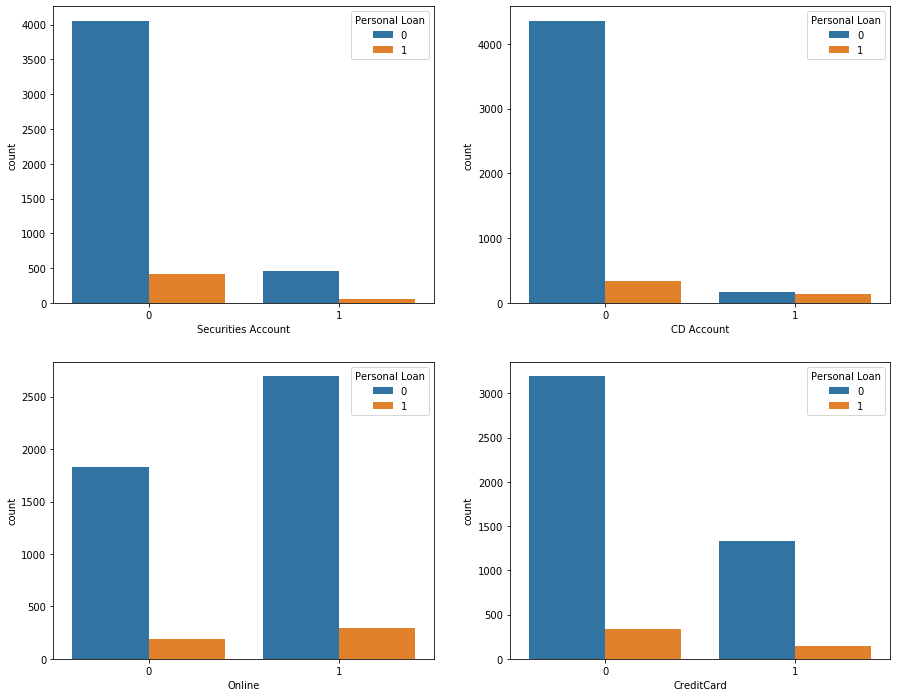

In [56]:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(15,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan',data=df)
    k=k+1
plt.show()

* very minimal number of people who have Securities Account have opted the Personal Loan.
* People without the CD Accounts tend to have taken more Personal Loan. 
*  Most of the people with the CreditCard seems to have not taken the Personal Loan

### Checking for Imblanced data 

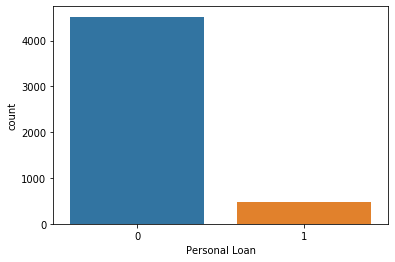

In [61]:
sns.countplot(x='Personal Loan' , data=df)

Data is Imblanced ,applying Oversmpling method where the miniority classes are duplicated to match the majority classes 

In [62]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
 using Randm

In [75]:
from sklearn.model_selection import train_test_split

In [85]:
y = df['Personal Loan']
x = df[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard']]


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
x_train.shape

(3486, 9)

In [91]:
x_test.shape

(872, 9)

In [92]:
y_train.shape

(3486,)

# Building the classification model 
* Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
clf= LogisticRegression()

In [95]:
clf.fit(x_train,y_train)

D:\pratz\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Validation

In [97]:
y_pred= clf.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
confusion_matrix(y_test,y_pred)

array([[817,   1],
       [ 40,  14]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test,y_pred)

0.9529816513761468

In [104]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.98       818\n           1       0.93      0.26      0.41        54\n\n    accuracy                           0.95       872\n   macro avg       0.94      0.63      0.69       872\nweighted avg       0.95      0.95      0.94       872\n'

* The model gives 95 % accuaracy ,i.e 95 % of test data has been predicted correctly.